In [148]:
import pandas as pd
import matplotlib
%matplotlib inline

import numpy as np
import matplotlib.pylab as plt
from datetime import datetime
from pandas import Grouper
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from pandas import DataFrame
from pandas.plotting import autocorrelation_plot

dir = 'C:\\Users\\gohka\\Documents\\PredictiveAnalytics\\Datasets\\Internet usage 2019\\'
files = ['11_2017.csv','12_2017.csv','01_2018.csv','02_2018.csv','03_2018.csv','04_2018.csv','05_2018.csv','06_2018.csv','07_2018.csv','08_2018.csv','09_2018.csv','10_2018.csv','11_2018.csv','12_2018.csv','01_2019.csv', '02_2019.csv', '03_2019.csv', '04_2019.csv', '05_2019.csv', '06_2019.csv']
    
data = [pd.read_csv(dir + each) for each in files]
df = pd.concat(data)
df['Date']=pd.to_datetime(df['TIMESTAMP'])
df['TOTAL'] = df['TOTAL'].apply(lambda x: round(x/(1024*1024*1024),2))
df['UPLOADS'] = df['UPLOADS'].apply(lambda x: round(x/(1024*1024*1024),2))
df['ANYTIME'] = df['ANYTIME'].apply(lambda x: round(x/(1024*1024*1024),2))
df['FREEZONE'] = df['FREEZONE'].apply(lambda x: round(x/(1024*1024*1024),2))
df.drop_duplicates(subset ="Date",  keep = False, inplace = True) 
df.set_index('Date', inplace=True)

df_total = df['ANYTIME']

print(df_total.head())
print('\n Data Types:')
print(df_total.dtypes)



Date
2017-11-15    2.83
2017-11-16    6.48
2017-11-17    6.60
2017-11-18    5.21
2017-11-19    5.25
Name: ANYTIME, dtype: float64

 Data Types:
float64


In [116]:
df.describe()

,TOTAL,UPLOADS,ANYTIME,FREEZONE
count,579.000000,579.000000,579.000000,579.000000
mean,6.177358,0.293385,4.481537,1.694663
std,6.936825,0.344212,5.284214,3.712602
min,0.000000,0.000000,0.000000,0.000000
25%,2.165000,0.140000,1.935000,0.000000
50%,4.470000,0.220000,3.440000,0.010000
75%,7.880000,0.350000,5.525000,1.940000
max,75.440000,5.640000,75.430000,40.400000


## Box-plot Anaysis: Internet Usage in GB grouped by Days

<Figure size 1440x720 with 0 Axes>

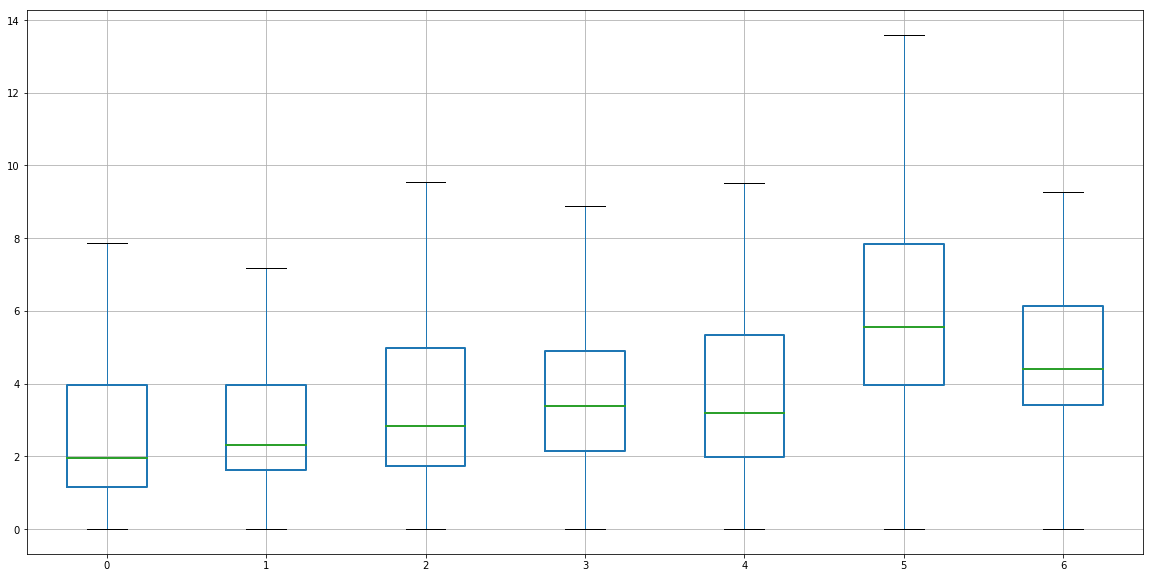

In [150]:
plt.figure(figsize=(20,10))
groups = df_total.groupby([df_total.index.dayofweek])
vals = []
for name, group in groups:
    vals.append(group[df_total.index].dropna().tolist())
df2 = pd.DataFrame(vals)
plt.figure(figsize=(20,10))
df2 = df2.T
boxprops = dict(linestyle='-', linewidth=2, color='k')
medianprops = dict(linestyle='-', linewidth=2, color='R')
df2.boxplot(showfliers=False, boxprops=boxprops, medianprops=medianprops) 

## Box-plot Anaysis: Internet Usage in GB grouped by Month

<Figure size 1440x720 with 0 Axes>

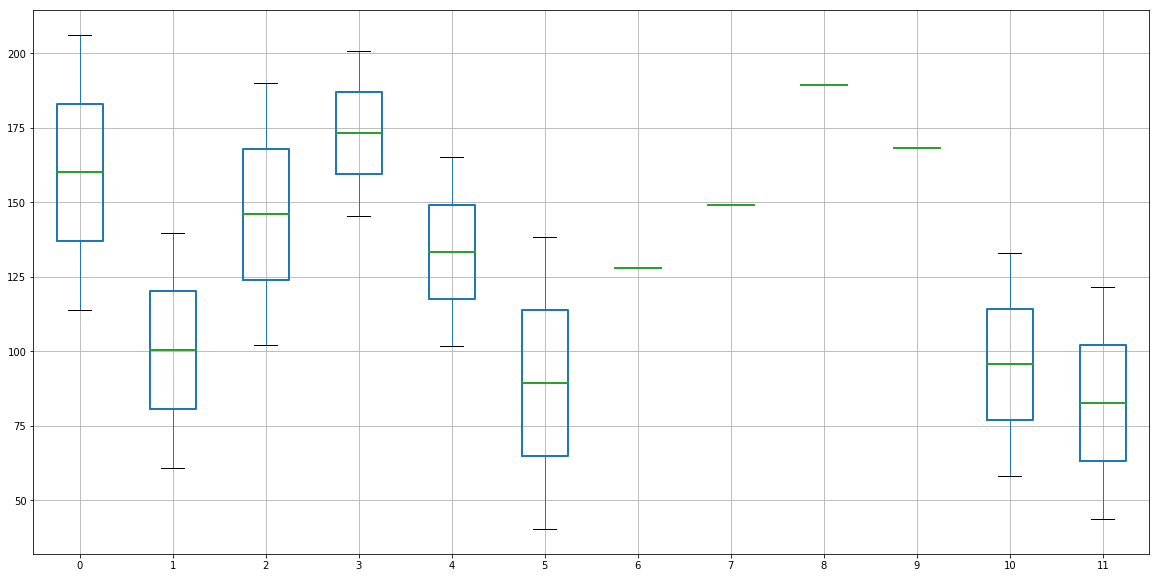

In [151]:
ts = df_total.resample('M').sum()
plt.figure(figsize=(20,10))
groups = ts.groupby([ts.index.month])
vals = []
for name, group in groups:
    vals.append(group[ts.index].dropna().tolist())
df3 = pd.DataFrame(vals)
df3 = df3.T
plt.figure(figsize=(20,10))
boxprops = dict(linestyle='-', linewidth=2, color='k')
medianprops = dict(linestyle='-', linewidth=2, color='R')
df3.boxplot(showfliers=False, boxprops=boxprops, medianprops=medianprops) 


test


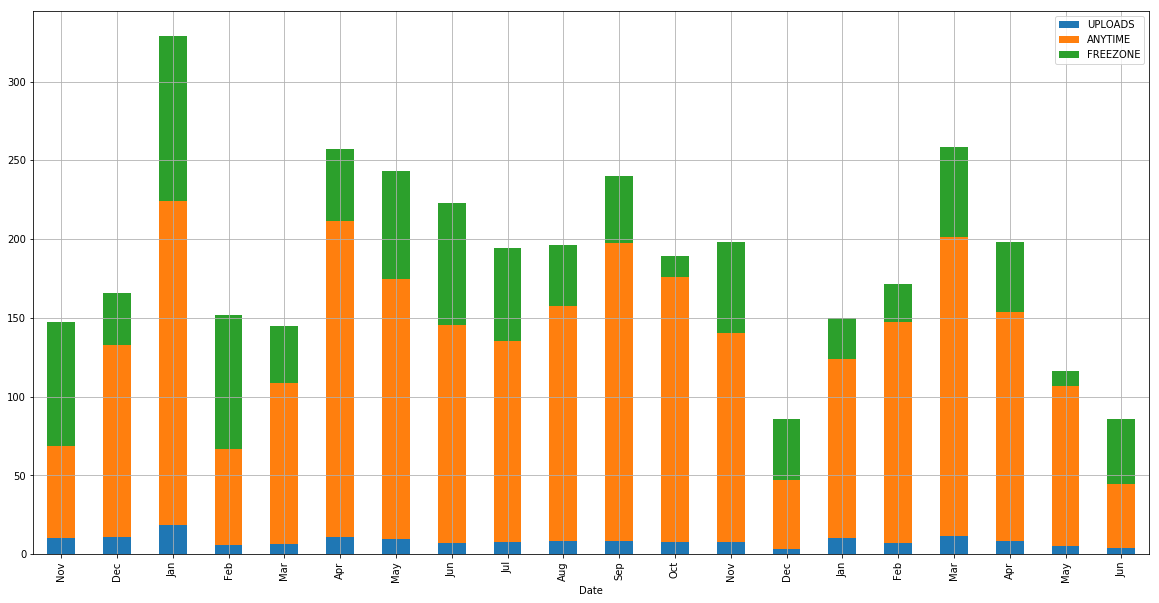

In [153]:
stacked = df.copy()
stacked = stacked.resample('M').sum()
stacked = stacked.drop(columns=['TOTAL'])
ax = stacked.plot(kind='bar', stacked=True, figsize=(20,10), grid=True)
ax.set_xticklabels([pandas_datetime.strftime("%b") for pandas_datetime in ts2.index])
print('test')

Slope -3.0887142857142846
NRMSE: 0.23562101791296866


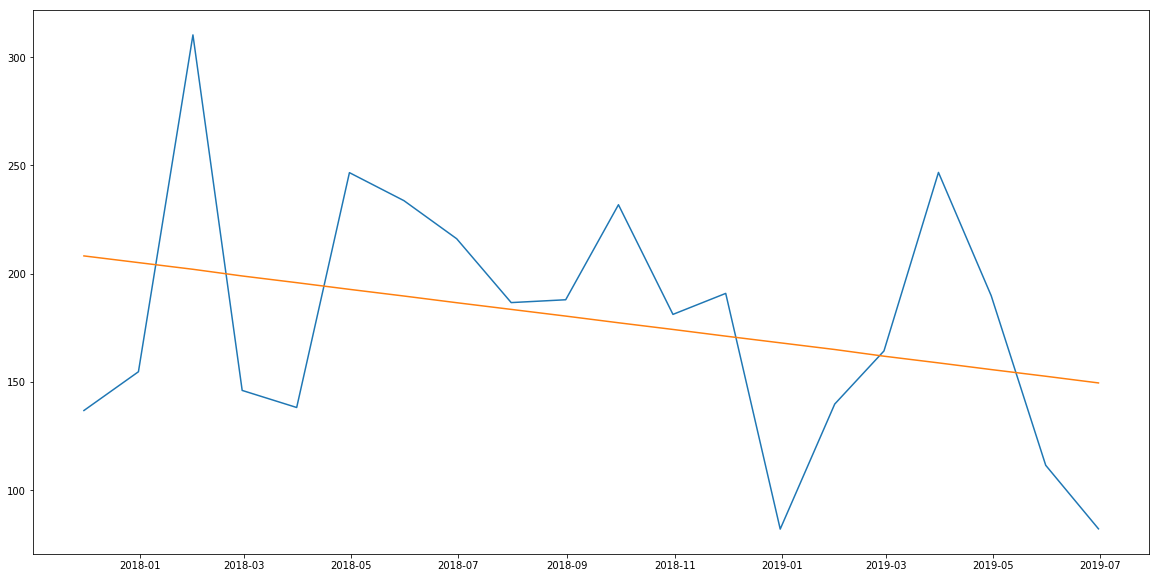

In [127]:
coefficients, residuals, _, _, _ = np.polyfit(range(len(ts2.index)),ts2,1,full=True)
mse = residuals[0]/(len(ts.index))
nrmse = np.sqrt(mse)/(ts2.max() - ts2.min())
print('Slope ' + str(coefficients[0]))
print('NRMSE: ' + str(nrmse))

ts4 = pd.DataFrame(ts, columns=['TOTAL'])
trend = [coefficients[0]*x + coefficients[1] for x in range(len(ts4))]
ts4['trend']=trend

plt.figure(figsize=(20,10))
plt.plot(ts4)
plt.show()

<Figure size 1440x720 with 0 Axes>

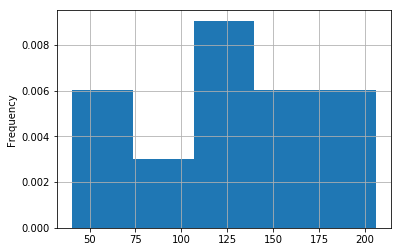

In [167]:

plt.figure(figsize=(20,10))
fig, ax = plt.subplots()
ts.plot.hist(ax=ax, bins=5, grid=True, density = True)


